In [1]:
#!pip3 install box2d-py
#!pip3 install gym[Box_2D]
import numpy as np
import gym
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import TensorBoard
import random
from collections import deque
import pandas as pd
from tqdm import tqdm
import time as time

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

In [2]:
def render_policy_net(model, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("LunarLander-v2")
    env.seed(seed)
    np.random.seed(seed)
    obs = env.reset()
    

    for steps in range(n_max_steps):
        #obs = np.reshape(obs, [1,obs.shape[0]])
        frames.append(env.render(mode="rgb_array"))
        left_proba = model.predict(obs)
        #action = int(np.random.rand()>left_proba)
        obs, reward, done, info = env.step(left_proba)
        if done:
            break
    env.close()
    return frames

In [3]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    anim.save("pole.gif", writer = animation.PillowWriter(fps=30))
    plt.close()
    return anim

In [ ]:
model = tf.keras.models.load_model("1p0_0p01.h5")

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

In [4]:
def test(saved_model):    
    
    # Keras load trained agent
    model = tf.keras.models.load_model(saved_model)
    
    # summary of the value-action model Q
    model.summary()
    
    # plot model structure
    plot_model(model, show_shapes = True, to_file='model.png')
    print("model weights:", model.get_weights()) 
   
    # test the trained agent
    env = gym.make("LunarLander-v2")
    scores = []
    
    # run the trained agent 100 trials
    for trial in range(100):
        score = 0
        cur_state = env.reset().reshape(1,8)
        for step in range(1000):
            env.render()
            action = np.argmax(model.predict(cur_state)[0])
            new_state, reward, done, _ = env.step(action)
            new_state = new_state.reshape(1,8)
            score += reward
            cur_state = new_state
            if done:
                break   
        
        scores.append(score)
        print('\rtrial {}\t Score: {:.3f}'.format(trial, (score)), end="")
              
    env.close()
    
    return scores

In [5]:
test_scores = test("tryout.h5")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 4,996
Trainable params: 4,996
Non-trainable params: 0
_________________________________________________________________
model weights: [array([[-3.56938541e-02,  1.44764811e-01,  1.25144105e-02,
         1.18717003e+00,  9.89514664e-02,  7.00134814e-01,
         2.59327471e-01,  4.35515553e-01, -1.24769226e-01,
         2.50523061e-01,  5.50180435e-01, -2.18755066e-01,
     

trial 99	 Score: 240.465

In [ ]:
env.close()

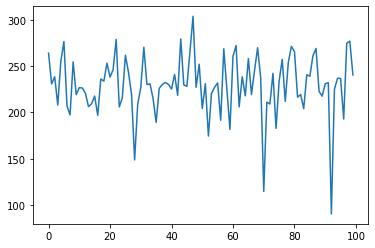

In [9]:
plt.plot(np.arange(len(test_scores)), test_scores)